# <div style="text-align:center; color:rgba(37, 40, 80);">11752 Machine Learning</div>
# <div style="text-align:center; color:rgba(37, 40, 80);">Master in Intelligent Systems</div>
# <div style="text-align:center; color:rgba(37, 40, 80);">Universitat de les Illes Balears</div>

### <div style="text-align:center; color:white;"> Handout #2: **Supervised learning**</div>

#### **Integrants:** Jason Adel Noboa Rivera, Pedro Marti Pico
#### **Group:** 07





In [2]:
import numpy as np
import cvxpy as cp
from sklearn import svm

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

group = '07' 

##### T1. **Given dataset dsgg1.txt:**

a)	Solve for the SVM analytically using the Karush-Kuhn-Tucker conditions and the Wolfe dual representation making use of the quadratic programming solver and:

•	find and report the support vectors (NOTE: due to round-off errors, it is likely none of the λ_i are exactly 0, but close, e.g. 10^(-6)), and

•	calculate and report the resulting decision function g(x)=w^T x+w_0.

In [49]:
def build_H(X, y):
    H = []
    for x1, y1 in zip(X,y):
        rows = []
        for x2, y2 in zip(X,y):
            value = (y1 * y2 * np.dot(x1, x2)).item()
            rows.append(value)
        H.append(rows)
    return H

def calculate_w(X,y,lm):
    index = [i for i, lamb in enumerate(lm) if lamb[0] > 1e-6] #Index of values different of 0
    w = [0,0]
    for i in index:
        w += np.multiply(lm[i]*y[i],X[i])
    return w

def calculate_w0(X,y,w,lm):
    index = [i for i, lamb in enumerate(lm) if lamb[0] > 1e-6]
    w0 = [0]
    for i in index:
        w0 += y[i] - w @ X[i].T #Formula is yi - w.Txi but we did in this way beacuse the disposition of the samples
    return w0/len(index)
    

In [57]:
'''
1. commented source code
2. support vectors
3. decision function 
'''

import cvxpy as cp

task = 1
data = np.loadtxt('ds'+group+str(task)+'.txt')
X = data[:,0:2]
y = data[:,2:3] #CLass labels are 1 for w1 and 0 for w2

for i in y:
    if i[0] == 0:
        i[0] = -1 #Change -1 instead 0 to execute the solver


N = X.shape[0]
P = build_H(X,y)
G = -np.identity(N)
h = np.zeros((N,1))
A = y.reshape((1,N))
b = 0.0
z = cp.Variable((N,1))
P = P + (1e-8) * np.identity(N) # for numerical stability
prob = cp.Problem(cp.Minimize(0.5*cp.quad_form(z,P) - cp.sum(z)), 
                  [G @ z <= h, A @ z == b])
prob.solve(solver = cp.ECOS)
#print(prob.status)
lm = z.value  #This are landas

'''Support Vectors'''
index = [i for i, lamb in enumerate(lm) if lamb[0] > 1e-6] 
sv = X[index]
print(f"Support Vectors:\n {sv}")

'''Decision function'''
w = calculate_w(X,y,lm)
w0 = calculate_w0(X,y,w,lm)

#print(f"w = {(w.round(5))}")
#print(f"w0 = {(w0.round(5))}")
print(f'\ng(x) = {w[0].round(5)}x1 + {w[1].round(5)}x2 + {w0[0].round(5)} = 0')


Support Vectors:
 [[-0.82782933 -0.56098003]
 [-3.89957879  2.18935727]
 [ 0.2668493   1.38880936]]

g(x) = 0.61119x1 + 0.68261x2 + -0.11111 = 0


b)	Generate the following plots:

•	a first plot with the training samples, highlighting the support vectors and plotting the 2D decision curve

•	a second plot with the classification map, i.e. evaluate the decision function for a 'regular' subset (grid) of points of the feature space
Use different markers and/or colours for each class.


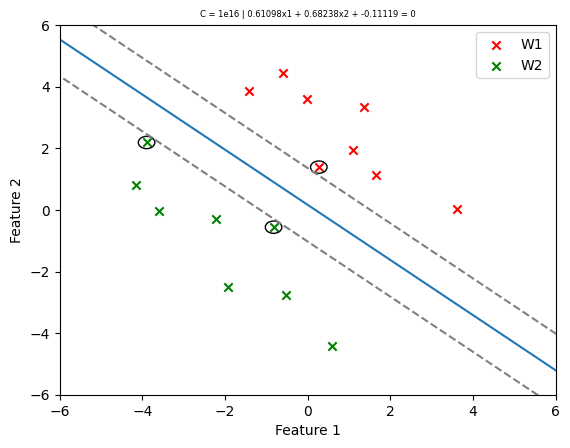

In [62]:
'''
1. commented source code
2. plot with samples and contour corresponding to the decision function
3. classification map
'''
y = np.squeeze(y)

'''Plot the samples'''
# assuming X is your data and y are your labels
X1 = X[y == 1.0]  # points of class w1
X2 = X[y == -1.0]  # points of class w2

plt.scatter(X1[:, 0], X1[:, 1], color='red', marker='x', label='W1')  # plot points of class 0
plt.scatter(X2[:, 0], X2[:, 1], color='green', marker='x', label='W2')  # plot points of class 1

'''Add the circles in supported vector machines'''
for loc in sv:
    px, py = loc
    circle = Circle((px,py), 0.2, fill=False)
    plt.gca().add_patch(circle)

# set the limits of the axes
plt.xlim([-6, 6])
plt.ylim([-6, 6])

'''Add the decision curve'''
x_values = np.linspace(-10, 10, 10)

# calculate corresponding y values
y_values = (-w[0] / w[1]) * x_values - w0[0] / w[1]

'''Add the segmented lines'''
#Calculate the distance of the segmented line: 1/||w||
d = 1/np.linalg.norm(w) 

# calculate y values for the segmented lines
y_values_segmented_line1 = y_values + d / np.sqrt(w[0]**2 + w[1]**2)
y_values_segmented_line2 = y_values - d / np.sqrt(w[0]**2 + w[1]**2)

# add the segmented lines to the plot
plt.plot(x_values, y_values_segmented_line1, '--', color = 'grey')
plt.plot(x_values, y_values_segmented_line2, '--', color = 'grey')

# add the line to the plot
plt.plot(x_values, y_values)


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'C = 1e16 | {w[0].round(5)}x1 + {w[1].round(5)}x2 + {w0[0].round(5)} = 0', fontsize = 6 )
plt.legend()
plt.show()

c)	Compare the results obtained with the ones resulting from the scikit-learn SVC object: i.e. report the support vectors returned by SVC and the corresponding decision function.

[0.61097906 0.6823798 ]


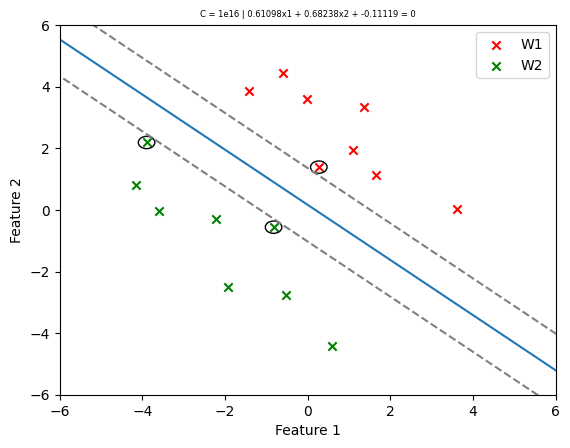

In [61]:
'''
1. commented source code
2. support vectors
3. decision function
4. plot with samples and contour corresponding to the decision function
5. classification map
'''
y = np.squeeze(y)

clf = svm.SVC(C = 1e16, kernel = 'linear')
clf.fit(X, y)

sv = clf.support_vectors_
w = clf.coef_.flatten()
print(w)
w0 = clf.intercept_
lm = clf.dual_coef_.flatten()

'''Plot the samples'''
# assuming X is your data and y are your labels
X1 = X[y == 1.0]  # points of class w1
X2 = X[y == -1.0]  # points of class w2

plt.scatter(X1[:, 0], X1[:, 1], color='red', marker='x', label='W1')  # plot points of class 0
plt.scatter(X2[:, 0], X2[:, 1], color='green', marker='x', label='W2')  # plot points of class 1

'''Add the circles in supported vector machines'''
for loc in sv:
    px, py = loc
    circle = Circle((px,py), 0.2, fill=False)
    plt.gca().add_patch(circle)

# set the limits of the axes
plt.xlim([-6, 6])
plt.ylim([-6, 6])

'''Add the decision curve'''
x_values = np.linspace(-10, 10, 10)

# calculate corresponding y values
y_values = (-w[0] / w[1]) * x_values - w0[0] / w[1]

'''Add the segmented lines'''
#Calculate the distance of the segmented line: 1/||w||
d = 1/np.linalg.norm(w) 

# calculate y values for the segmented lines
y_values_segmented_line1 = y_values + d / np.sqrt(w[0]**2 + w[1]**2)
y_values_segmented_line2 = y_values - d / np.sqrt(w[0]**2 + w[1]**2)

# add the segmented lines to the plot
plt.plot(x_values, y_values_segmented_line1, '--', color = 'grey')
plt.plot(x_values, y_values_segmented_line2, '--', color = 'grey')

# add the line to the plot
plt.plot(x_values, y_values)


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'C = 1e16 | {w[0].round(5)}x1 + {w[1].round(5)}x2 + {w0[0].round(5)} = 0', fontsize = 6 )
plt.legend()
plt.show()